In [1]:

import os
import numpy as np
from PIL import Image

In [2]:
root = './k_mean_data/'

# Image Denoise

In [3]:
def get_bin_table(threshold=128):
    table = []
    for i in range(256):
        if i < threshold:
            table.append(0)
        else:
            table.append(1)
    return table

def remove_noise_pixel(img, noise_point_list):
    for item in noise_point_list:
        img.putpixel((item[0], item[1]), 1)

def collect_noise_point(img):
    noise_point_list = []
    for x in range(img.width):
        for y in range(img.height):
            res_9 = sum_9_region_new(img, x, y)
            if (0 < res_9 < 3) and img.getpixel((x, y)) == 0:
                pos = (x, y)
                noise_point_list.append(pos)
    return noise_point_list

def sum_9_region_new(img, x, y):
    cur_pixel = img.getpixel((x, y))
    width = img.width
    height = img.height
    if cur_pixel == 1:
        return 0
    if y < 3:
        return 1
    elif y > height - 3:
        return 1
    else:
        if x < 3:
            return 1
        elif x == width - 1:
            return 1
        else:
            sum = img.getpixel((x - 1, y - 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1)) \
                  + img.getpixel((x, y - 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y - 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))
            return 9 - sum

# Get label

In [8]:
label_list = {}
f = open('training data dic.txt', 'r', encoding="utf-8")
for idx, line in enumerate(f.readlines()):
    if idx == 50:
        break
    label_list[line[0]] = idx

# Load data


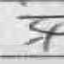

In [10]:
is_denoise = False
data = []
files = []
labels = []
binary = None
for idx, dir_ in enumerate(os.listdir(root)):
    for _, file in enumerate(os.listdir(root + '/' + dir_)):
        img_path = root + dir_ + '/' + file
        img = Image.open(img_path)
        img = img.resize((64, 64))
        im = np.array(img).reshape(-1)
        if is_denoise:
            table = get_bin_table(np.mean(im))
            binary = img.point(table, '1')
            noise_point_list = collect_noise_point(binary)
            remove_noise_pixel(binary, noise_point_list)
            im = np.array(binary).reshape(-1)
        data.append(im)
        files.append(img_path)
        labels.append(label_list[file[-5:-4]])
train_img = np.array(data)
img

In [11]:
print(train_img.shape)
len(labels)

(2881, 4096)


2881

# K-nearest neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
